# Automating Crypto Website API Pull

In [32]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'16',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '237779a3-04ce-4111-8588-568f3a625505',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-01-18T15:31:17.105Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 8754}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10755, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [33]:
type(data)

dict

In [39]:
import pandas as pd


pd.set_option('display.max_columns', None)
pd.set_option('dislay_max_rows', None)

OptionError: No such keys(s): 'dislay_max_rows'

In [35]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10755,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.960169e+07,1.960169e+07,False,NaN,1,NaN,NaN,None,2024-01-18T15:30:00.000Z,42691.839489,1.874471e+10,-17.3450,0.386280,0.225079,-10.660271,-0.046376,16.781422,44.242151,8.368321e+11,49.8597,8.965286e+11,None,2024-01-18T15:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:31:27.907258
1,1027,Ethereum,ETH,ethereum,8271,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201782e+08,1.201782e+08,True,NaN,2,NaN,NaN,None,2024-01-18T15:30:00.000Z,2526.026738,9.765903e+09,-14.4942,0.074790,-0.865445,-4.588939,14.662934,28.677600,57.050074,3.035734e+11,18.0874,3.035734e+11,None,2024-01-18T15:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:31:27.907258
2,825,Tether USDt,USDT,tether,72020,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.516502e+10,9.860164e+10,True,NaN,3,NaN,NaN,None,2024-01-18T15:29:00.000Z,0.999272,3.799794e+10,-8.0169,0.006564,-0.017582,-0.096997,-0.070707,-0.122766,-0.112538,9.509577e+10,5.6655,9.852990e+10,None,2024-01-18T15:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-18 10:31:27.907258
3,1839,BNB,BNB,bnb,2022,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495491e+08,1.495491e+08,False,NaN,4,NaN,NaN,None,2024-01-18T15:29:00.000Z,314.614172,1.010974e+09,-15.9641,0.257511,0.672181,0.801390,25.122302,29.090960,47.323129,4.705028e+10,2.8031,4.705028e+10,None,2024-01-18T15:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:31:27.907258
4,5426,Solana,SOL,solana,616,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.328069e+08,5.673939e+08,True,NaN,5,NaN,NaN,None,2024-01-18T15:30:00.000Z,98.660811,2.506505e+09,-5.2925,-0.270010,-1.938135,-4.932052,32.807763,64.136128,265.933421,4.270108e+10,2.5440,5.597955e+10,None,2024-01-18T15:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:31:27.907258
5,52,XRP,XRP,xrp,1207,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.433984e+10,9.998798e+10,False,NaN,6,NaN,NaN,None,2024-01-18T15:30:00.000Z,0.562709,8.883386e+08,3.0965,0.075195,-1.283001,-7.636576,-7.219488,-9.531403,6.631850,3.057751e+10,1.8215,5.627089e+10,None,2024-01-18T15:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:31:27.907258
6,3408,USDC,USDC,usd-coin,16252,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.563390e+10,2.563390e+10,False,NaN,7,NaN,NaN,None,2024-01-18T15:30:00.000Z,1.000615,4.899561e+09,-8.7012,0.054185,0.053166,0.078468,0.028575,0.063485,0.064954,2.564965e+10,1.5279,2.564965e+10,None,2024-01-18T15:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-18 10:31:27.907258
7,2010,Cardano,ADA,cardano,1033,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.539754e+10,3.654270e+10,False,NaN,8,NaN,NaN,None,2024-01-18T15:29:00.000Z,0.516237,2.840700e+08,-9.1730,0.086400,-2.365039,-13.041932,-11.417901,36.938894,106.151624,1.827352e+10,1.0887,2.323067e+10,None,2024-01-18T15:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:31:27.907258
8,5805,Avalanche,AVAX,avalanche,641,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p..."

In [36]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'16',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '237779a3-04ce-4111-8588-568f3a625505',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\KaeTech\Python Basics\API.csv')
        df.to_csv(r'C:\Users\KaeTech\Python Basics\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\KaeTech\Python Basics\API.csv', mode = 'a', header = False)

In [37]:
import os
from time import time 
from time import sleep

for i in range(333):
    api_runner()
    print("API Runner Completed")
    sleep(60)
exit()

API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [ ]:
df3 = pd.read_csv(r'C:\Users\KaeTech\Python Basics\API.csv')
df3

In [48]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10755,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000,19601687.000,19601687.000,False,NaN,1,NaN,NaN,None,2024-01-18T15:30:00.000Z,42691.839,18744714777.280,-17.345,0.386,0.225,-10.660,-0.046,16.781,44.242,836832075119.725,49.860,896528629271.260,None,2024-01-18T15:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:31:27.907258
1,1027,Ethereum,ETH,ethereum,8271,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120178235.369,120178235.369,True,NaN,2,NaN,NaN,None,2024-01-18T15:30:00.000Z,2526.027,9765903429.821,-14.494,0.075,-0.865,-4.589,14.663,28.678,57.050,303573435872.848,18.087,303573435872.850,None,2024-01-18T15:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:31:27.907258
2,825,Tether USDt,USDT,tether,72020,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,95165015480.891,98601637401.382,True,NaN,3,NaN,NaN,None,2024-01-18T15:29:00.000Z,0.999,37997937217.515,-8.017,0.007,-0.018,-0.097,-0.071,-0.123,-0.113,95095773956.468,5.665,98529895410.380,None,2024-01-18T15:29:00.000Z,1027.000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-18 10:31:27.907258
3,1839,BNB,BNB,bnb,2022,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149549135.384,149549135.384,False,NaN,4,NaN,NaN,None,2024-01-18T15:29:00.000Z,314.614,1010973965.577,-15.964,0.258,0.672,0.801,25.122,29.091,47.323,47050277327.662,2.803,47050277327.660,None,2024-01-18T15:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:31:27.907258
4,5426,Solana,SOL,solana,616,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,432806923.643,567393941.298,True,NaN,5,NaN,NaN,None,2024-01-18T15:30:00.000Z,98.661,2506504948.270,-5.293,-0.270,-1.938,-4.932,32.808,64.136,265.933,42701082139.528,2.544,55979546465.910,None,2024-01-18T15:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:31:27.907258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,6636,Polkadot,DOT,polkadot-new,666,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1268757746.833,1401018248.541,True,NaN,12,NaN,NaN,None,2024-01-18T15:36:00.000Z,7.204,178502787.046,-8.191,0.394,-2.256,-13.491,5.957,36.225,93.387,9140643475.813,0.545,10093501572.690,None,2024-01-18T15:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:37:47.066456
12,1975,Chainlink,LINK,chainlink,1574,2017-09-20T00:00:00.000Z,"[platform, defi, oracles, smart-contracts, sub...",1000000000.000,568099970.453,1000000000.000,False,NaN,13,NaN,NaN,None,2024-01-18T15:36:00.000Z,15.194,545268552.010,-23.988,-0.642,-6.431,-0.710,6.328,7.501,99.293,8631456210.948,0.515,15193551592.810,None,2024-01-18T15:36:00.000Z,1027.000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2024-01-18 10:37:47.066456
13,11419,Toncoin,TON,toncoin,189,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3456923760.934,5101369583.235,True,NaN,14,3414166606.000,7677328970.791,None,2024-01-18T15:37:00.000Z,2.249,52385567.896,-13.514,-0.050,-3.553,-1.574,4.535,-4.502,7.618,7773475639.119,0.464,11471289193.460,None,2024-01-18T15:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:37:47.066456
14,3890,Po

In [43]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [44]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10755,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000,19601687.000,19601687.000,False,NaN,1,NaN,NaN,None,2024-01-18T15:30:00.000Z,42691.839,18744714777.280,-17.345,0.386,0.225,-10.660,-0.046,16.781,44.242,836832075119.725,49.860,896528629271.260,None,2024-01-18T15:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:31:27.907258
1,1027,Ethereum,ETH,ethereum,8271,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120178235.369,120178235.369,True,NaN,2,NaN,NaN,None,2024-01-18T15:30:00.000Z,2526.027,9765903429.821,-14.494,0.075,-0.865,-4.589,14.663,28.678,57.050,303573435872.848,18.087,303573435872.850,None,2024-01-18T15:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:31:27.907258
2,825,Tether USDt,USDT,tether,72020,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,95165015480.891,98601637401.382,True,NaN,3,NaN,NaN,None,2024-01-18T15:29:00.000Z,0.999,37997937217.515,-8.017,0.007,-0.018,-0.097,-0.071,-0.123,-0.113,95095773956.468,5.665,98529895410.380,None,2024-01-18T15:29:00.000Z,1027.000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-18 10:31:27.907258
3,1839,BNB,BNB,bnb,2022,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149549135.384,149549135.384,False,NaN,4,NaN,NaN,None,2024-01-18T15:29:00.000Z,314.614,1010973965.577,-15.964,0.258,0.672,0.801,25.122,29.091,47.323,47050277327.662,2.803,47050277327.660,None,2024-01-18T15:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:31:27.907258
4,5426,Solana,SOL,solana,616,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,432806923.643,567393941.298,True,NaN,5,NaN,NaN,None,2024-01-18T15:30:00.000Z,98.661,2506504948.270,-5.293,-0.270,-1.938,-4.932,32.808,64.136,265.933,42701082139.528,2.544,55979546465.910,None,2024-01-18T15:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:31:27.907258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,6636,Polkadot,DOT,polkadot-new,666,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1268757746.833,1401018248.541,True,NaN,12,NaN,NaN,None,2024-01-18T15:36:00.000Z,7.204,178502787.046,-8.191,0.394,-2.256,-13.491,5.957,36.225,93.387,9140643475.813,0.545,10093501572.690,None,2024-01-18T15:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:37:47.066456
12,1975,Chainlink,LINK,chainlink,1574,2017-09-20T00:00:00.000Z,"[platform, defi, oracles, smart-contracts, sub...",1000000000.000,568099970.453,1000000000.000,False,NaN,13,NaN,NaN,None,2024-01-18T15:36:00.000Z,15.194,545268552.010,-23.988,-0.642,-6.431,-0.710,6.328,7.501,99.293,8631456210.948,0.515,15193551592.810,None,2024-01-18T15:36:00.000Z,1027.000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2024-01-18 10:37:47.066456
13,11419,Toncoin,TON,toncoin,189,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3456923760.934,5101369583.235,True,NaN,14,3414166606.000,7677328970.791,None,2024-01-18T15:37:00.000Z,2.249,52385567.896,-13.514,-0.050,-3.553,-1.574,4.535,-4.502,7.618,7773475639.119,0.464,11471289193.460,None,2024-01-18T15:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-18 10:37:47.066456
14,3890,Po

In [49]:
df4 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [56]:
import pandas as pd


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [60]:
index = pd.Index(range(102))

In [65]:
df5 = df4.stack().to_frame(name='percentages').reset_index().rename(columns={'level_1': 'percent_change', 'percentages': 'values'})
df5

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.353
1,Bitcoin,quote.USD.percent_change_24h,0.193
2,Bitcoin,quote.USD.percent_change_7d,-10.508
3,Bitcoin,quote.USD.percent_change_30d,0.062
4,Bitcoin,quote.USD.percent_change_60d,16.754
5,Bitcoin,quote.USD.percent_change_90d,44.326
6,Ethereum,quote.USD.percent_change_1h,0.080
7,Ethereum,quote.USD.percent_change_24h,-0.899
8,Ethereum,quote.USD.percent_change_7d,-4.363
9,Ethereum,quote.USD.percent_change_30d,14.860


percentages    102
dtype: int64

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df5['percent_change'] = df5['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

C:\Users\KaeTech\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


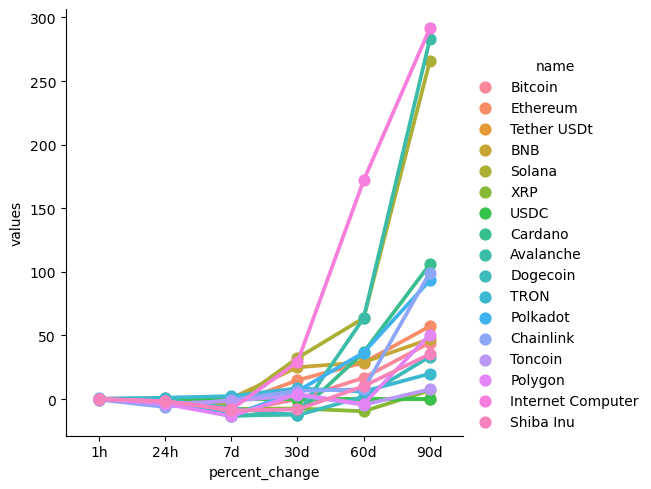

In [69]:
sns.catplot(x='percent_change', y='values', hue='name', data =df5, kind = 'point')
#not reading values correctly need to fix 